## ИД23-1 Маслов АН Усложненный пример из лекции

## Усложненный пример

In [77]:
import numpy as np
import dask
import dask.threaded as dthr
from dask.threaded import get
from dask.delayed import Delayed
import time

In [78]:
def mul_pow(i, k, o): #умножение с корнем
    for q in range (10000000):
        i= i * pow(k,(1/o))
    return i

def sum_pow(i, j): #сложение с корнем
    for k in range (10000000):
        i = i + pow(j, (1/j))
    return i



In [79]:
start_time = time.time()
a = 5000000
x = 5000000
u = 555
k = 100
b = mul_pow(a, u, k)
y = mul_pow(x, u, k)
z = sum_pow(b, y)
norm_time = time.time() - start_time
print('Время выполнения: ', norm_time)
print('Результат: ', z)

Время выполнения:  4.758375883102417
Результат:  inf


In [80]:
dsk = {
'a': 5000000,
'x': 5000000,
'u': 555,
'k': 100,
'b': (mul_pow, 'a', 'u', 'k'),
'y': (mul_pow, 'x', 'u', 'k'),
'z': (sum_pow, 'b', 'y')
}

In [81]:
start_time = time.time()
result = get(dsk, 'z')
dask_time = time.time() - start_time
print('Время выполнения: ', dask_time)
print('Результат: ', z)

Время выполнения:  3.5844993591308594
Результат:  inf


In [ ]:
print('Время выполнения с dask: ', dask_time)
print('Время выполнения без dask: ', norm_time)
print('Вывод: C dask, код выполняется быстрее')

Время выполнения с dask:  3.5844993591308594
Время выполнения без dask:  4.758375883102417
Вывод: с dask код выполняется быстрее


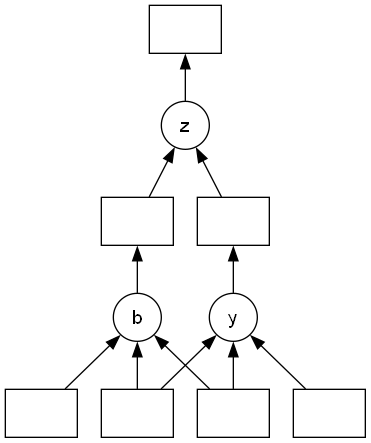

In [83]:
# оборачиваем dsk в Dask Collection (Delayed)
delayed_dsk = Delayed("w", dsk)
# визуализируем:
delayed_dsk.visualize()